In [2]:
import numpy as np
import pandas as pd

In [4]:
column_name = ['user_id', 'item_id', 'rating', 'timestamps']
df = pd.read_csv('u.data', sep='\t', names=column_name)

In [5]:
df.head()

,user_id,item_id,rating,timestamps
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id       100003 non-null int64
item_id       100003 non-null int64
rating        100003 non-null int64
timestamps    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
movie_title = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df, movie_title, on='item_id')

In [13]:
df.head()

,user_id,item_id,rating,timestamps,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Análise exploratória dos dados

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Agrupando dataframe pela coluna 'title' e obtendo a média das avaliações de cada grupo.

In [26]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

### Número de filmes distintos no dataframe

In [29]:
df.groupby('title')['rating'].mean().nunique()

896

### Média das avaliações dos agrupamentos por título ordenadadas em ordem decrescente

In [28]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

### Contagem de avaliações de cada filme ordenadas em ordem decrescente

In [31]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

### Criando novo dataframe apenas com o título do filme e a média de suas avaliações

In [32]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


### Adicionando uma nova coluna para guardar a contagem de avaliações de cada filme

In [40]:
ratings['count'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Forma do dataframe (1664 registros e 2 colunas)

In [41]:
ratings.shape

(1664, 2)

### Predominância em filmes que foram vistos por apenas um usuário e poucos filmes vistos por muitos usuários

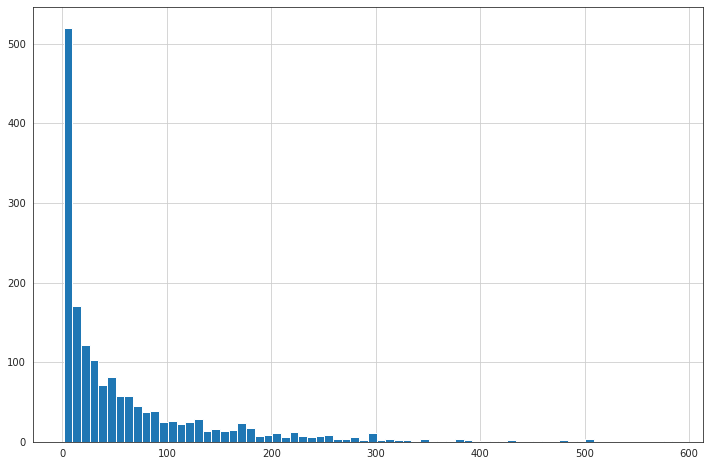

In [47]:
plt.figure(figsize=(12,8))
ratings['count'].hist(bins=70)

### Histograma de classificações em relação aos filmes

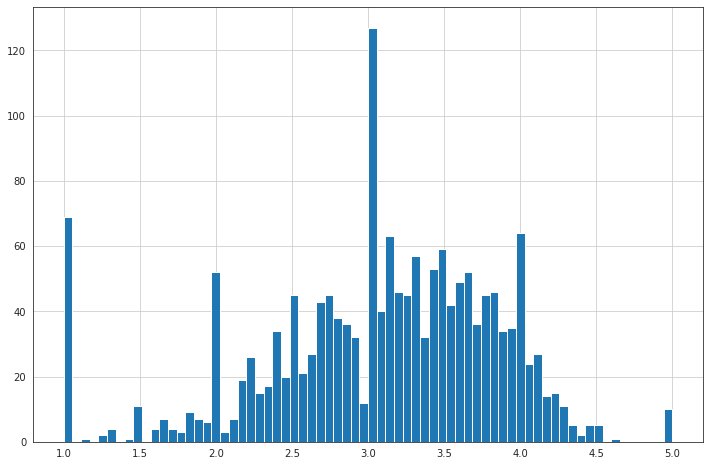

In [48]:
plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=70)

### Joinplot que mostra um comparativo entre a taxa de classificação do usuário no filme e o número de classificações.

<Figure size 864x576 with 0 Axes>

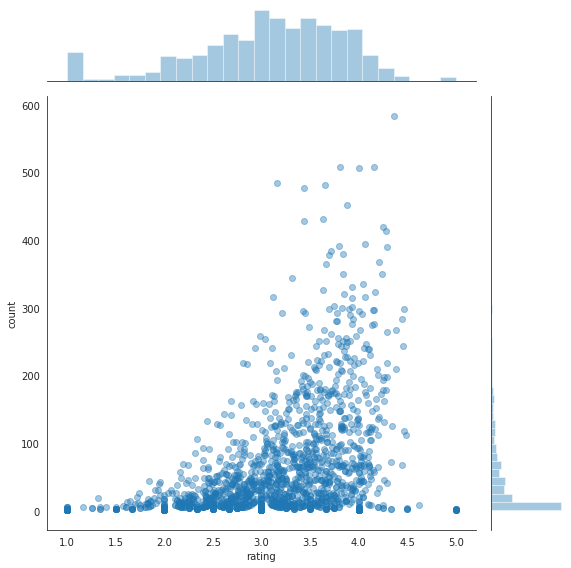

In [46]:
plt.figure(figsize=(12,8))
sns.jointplot(x='rating', y='count', data=ratings, alpha=0.4, height=8)